In [26]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scstats

# import mini MD modules
from miniMD import models
from miniMD import samplers
# import function to compute autocorrelation
from miniMD.samplers import autocorr


# Exercise 2.1
The code below creates $N=100000$ independent samples drawn from a standard normal distribution, bins the samples, and plots the corresponding histogram against the exact PDF of a normal distsribution.

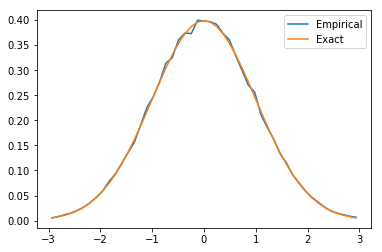

In [36]:
#Create iid samples  
nsteps = 100000
xiid = np.random.normal(0., 1., nsteps)

# Bin samples
qbins = np.linspace(-3,3,50)
Hq = np.histogram(xiid,bins=qbins,density=True)[0]
deltaq = qbins[1]-qbins[0]
qcenter = .5*deltaq + qbins[:-1]

#Plot results
fig, ax = plt.subplots()
ax.plot(qcenter,Hq,label="Empirical")
ax.plot(qcenter, scstats.norm.pdf(qcenter),label="Exact")
ax.legend()
plt.show()

## Task
Repeat the above experiment but now using a samples generated using an (approximate) MCMC method, i.e., the BAOAB Langevin sampler (you can use the code below).
- What do you observe?
- Create trace plots of the trajectories both for the iid sample and the sample generated with BAOAB. What do you observe?
- Change the values of the friction_constant and the stepsize. How does this effect appearance of the empirical distribution?

You can use the code snipped "autocorr(x_baoab[:,0],maxlag=100)" to compute the autocorrelation for the BAOAB samples up to a maximum lag time specified by the argument maxlag. Can you characterise how the form of the autocorrelation function relates to the statistical properties of the sample?

In [47]:
# Initial conditions for two particles
q_0 = np.array([0.0])
p_0 = np.array([0.0])
# initialise the particle model
model = models.HarmonicOscillator(q=q_0,p=p_0)
# Sample using BAOAB
sampler = samplers.BAOAB(model=model, 
                         stepsize=.1, 
                         inverse_temperature=1.0,
                         friction_constant=1.0, 
                        ) 
x_baoab, p_baoab = sampler.sample(nsteps=100000)